<a href="https://colab.research.google.com/github/gbaser54/kmeans-and-movie-recommendation-system/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


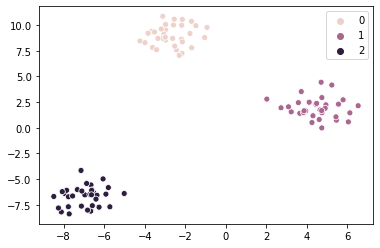

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3, random_state=42)
import seaborn as sns
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

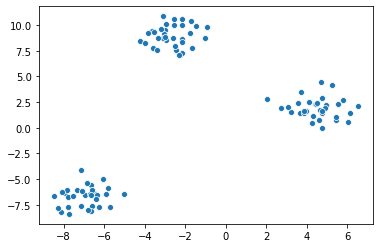

In [ ]:
sns.scatterplot(X[:, 0], X[:, 1])

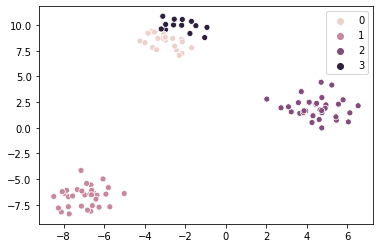

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)

model.fit(X)

y_gen = model.labels_

sns.scatterplot(X[:, 0], X[:, 1], hue=y_gen)

In [ ]:
model.cluster_centers_

array([[-2.95660471,  8.30877152],
       [-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013],
       [-2.20127958,  9.94858935]])

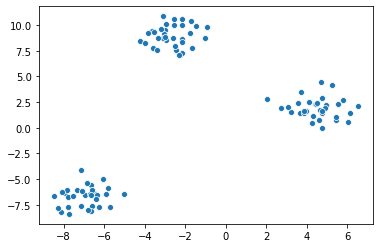

In [ ]:
sns.scatterplot(X[:, 0], X[:, 1])

In [ ]:
import random

In [ ]:
class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
    
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center) ** 2))
        

class CustomKMeans:
    
    def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
        
        
        for i in range(self.max_iters):
            
            labels = []
        
            # going for each point
            for point in X:

                # collecting disctances form every cluster
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))
                    
                    # finding closest cluster
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)

            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
            
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]

In [ ]:
model = CustomKMeans(n_clusters=2)
model.fit(X)

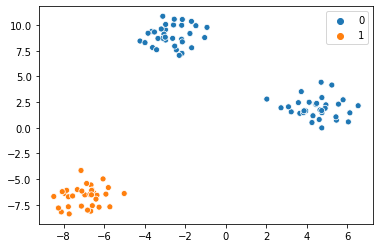

In [ ]:

sns.scatterplot(X[:, 0], X[:, 1], hue=model.labels_)